# PyMotions
## Giulia Passarelli, Hélio Paiva Neto, Warlen Rodrigues
### Projeto 3 de Robótica

### Pegando a base de dados e realizando a conta para os cinco ângulos faciais:

In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.multiclass import OneVsRestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
import matplotlib.pyplot as plt

dados = pd.read_csv("DataSet2.csv", sep=",")

dados.sort_values(by=['image'])

#0=Neutro; 1=Feliz; 2=Triste

,image,face_x,face_y,face_width,face_height,x0,y0,x1,y1,x2,...,y63,x64,y64,x65,y65,x66,y66,x67,y67,Categoria
11,20180530_110647.jpg,429,1657,1380,1380,642,2318,644,2454,659,...,2676,1530,2688,1342,2814,1247,2830,1157,2825,1
46,20180530_110650.jpg,736,1657,1380,1380,885,2136,885,2290,890,...,2605,1712,2645,1555,2642,1469,2650,1387,2637,2
39,20180530_110653.jpg,736,1810,1380,1380,895,2130,883,2284,881,...,2767,1646,2789,1506,2783,1435,2786,1368,2772,2
58,20180530_110659.jpg,869,1764,1150,1150,1020,2112,1022,2239,1032,...,2463,1720,2485,1584,2515,1514,2520,1448,2516,1
9,20180530_110701.jpg,1043,1789,958,958,999,2099,999,2230,1013,...,2486,1687,2510,1573,2476,1516,2477,1461,2474,2
47,20180530_110703.jpg,869,1764,1150,1150,963,2056,971,2183,983,...,2467,1644,2489,1547,2482,1500,2483,1455,2480,0
76,20180530_110813.jpg,996,1636,1151,1150,1073,2003,1082,2133,1107,...,2417,1845,2345,1678,2482,1601,2502,1526,2492,1
88,20180530_110815.jpg,996,1636,1151,1150,1085,2014,1093,2146,1120,...,2474,1811,2446,1674,2520,1604,2537,1537,2532,2
36,20180530_110818.jpg,996,1636,1151,1150,1104,2045,1111,2182,1139,...,2525,1811,2489,1690,2531,1626,2545,1564,2539,1
24,20180530_111020.jpg,741,1764,1150,1150,787,2170,794,2323,806,...,2681,1680,2619,1467,2734,1381,2753,1298,2748,1


In [2]:
ang1=[]
ang2=[]
ang3=[]
ang4=[]
ang5=[]

for index,row in dados.iterrows():
    
    #ANGULO 1
    vec1_1 = np.array([row['x63']-row['x48'], row['y63']-row['y48']])
    vec1_2 = np.array([row['x67']-row['x48'], row['y67']-row['y48']])
    angulo1 = np.math.atan2(np.linalg.det([vec1_1,vec1_2]),np.dot(vec1_1,vec1_2))
    ang1.append(angulo1)
    
    #ANGULO 2
    vec2_1 = np.array([row['x33']-row['x48'], row['y62']-row['y48']])
    vec2_2 = vec1_1
    angulo2 = np.math.atan2(np.linalg.det([vec2_1,vec2_2]),np.dot(vec2_1,vec2_2))
    ang2.append(angulo2)
    
    #ANGULO 3
    vec3_1 = np.array([row['x31']-row['x48'], row['y31']-row['y48']])
    vec3_2 = np.array([row['x54']-row['x48'], row['y54']-row['y48']])
    angulo3 = np.math.atan2(np.linalg.det([vec3_1,vec3_2]),np.dot(vec3_1,vec3_2))
    ang3.append(angulo3)
    
    #ANGULO 4
    vec4_1 = np.array([row['x54']-row['x57'], row['y54']-row['y57']])
    vec4_2 = np.array([row['x48']-row['x57'], row['y48']-row['y57']])
    angulo4 = np.math.atan2(np.linalg.det([vec4_1,vec4_2]),np.dot(vec4_1,vec4_2))
    ang4.append(angulo4)
    
    #ANGULO 5
    vec5_1 = np.array([row['x31']-row['x51'], row['y31']-row['y51']])
    vec5_2 = np.array([row['x35']-row['x51'], row['y35']-row['y51']])
    angulo5 = np.math.atan2(np.linalg.det([vec5_1,vec5_2]),np.dot(vec5_1,vec5_2))
    ang5.append(angulo5)
    
dados['angulo1'] = pd.Series(ang1)
dados['angulo2'] = pd.Series(ang2)
dados['angulo3'] = pd.Series(ang3)
dados['angulo4'] = pd.Series(ang4)
dados['angulo5'] = pd.Series(ang5)    

#ang1 - 63,49,66
#ang2 - 34,49,63
#ang3 - 32,49,55
#ang4 - 55,58,49
#ang5 - 32,52,36

### Treinando:

In [3]:
X = dados.loc[:, ("angulo1", "angulo2", "angulo3", "angulo4", "angulo5")]
y = dados.loc[:, ("Categoria")]

In [4]:
clf = OneVsRestClassifier(tree.DecisionTreeClassifier()).fit(X, y)

### Testando:

In [5]:
teste = pd.read_csv("Teste.csv", sep=",")

ang1=[]
ang2=[]
ang3=[]
ang4=[]
ang5=[]

for index,row in teste.iterrows():
    
    #ANGULO 1
    vec1_1 = np.array([row['x63']-row['x48'], row['y63']-row['y48']])
    vec1_2 = np.array([row['x67']-row['x48'], row['y67']-row['y48']])
    angulo1 = np.math.atan2(np.linalg.det([vec1_1,vec1_2]),np.dot(vec1_1,vec1_2))
    ang1.append(angulo1)
    
    #ANGULO 2
    vec2_1 = np.array([row['x33']-row['x48'], row['y62']-row['y48']])
    vec2_2 = vec1_1
    angulo2 = np.math.atan2(np.linalg.det([vec2_1,vec2_2]),np.dot(vec2_1,vec2_2))
    ang2.append(angulo2)
    
    #ANGULO 3
    vec3_1 = np.array([row['x31']-row['x48'], row['y31']-row['y48']])
    vec3_2 = np.array([row['x54']-row['x48'], row['y54']-row['y48']])
    angulo3 = np.math.atan2(np.linalg.det([vec3_1,vec3_2]),np.dot(vec3_1,vec3_2))
    ang3.append(angulo3)
    
    #ANGULO 4
    vec4_1 = np.array([row['x54']-row['x57'], row['y54']-row['y57']])
    vec4_2 = np.array([row['x48']-row['x57'], row['y48']-row['y57']])
    angulo4 = np.math.atan2(np.linalg.det([vec4_1,vec4_2]),np.dot(vec4_1,vec4_2))
    ang4.append(angulo4)
    
    #ANGULO 5
    vec5_1 = np.array([row['x31']-row['x51'], row['y31']-row['y51']])
    vec5_2 = np.array([row['x35']-row['x51'], row['y35']-row['y51']])
    angulo5 = np.math.atan2(np.linalg.det([vec5_1,vec5_2]),np.dot(vec5_1,vec5_2))
    ang5.append(angulo5)
    
teste['angulo1'] = pd.Series(ang1)
teste['angulo2'] = pd.Series(ang2)
teste['angulo3'] = pd.Series(ang3)
teste['angulo4'] = pd.Series(ang4)
teste['angulo5'] = pd.Series(ang5)

Xt = teste.loc[:, ("angulo1", "angulo2", "angulo3", "angulo4", "angulo5")]

teste["Predicao"]=clf.predict(Xt)

teste

,image,face_x,face_y,face_width,face_height,x0,y0,x1,y1,x2,...,x67,y67,Categoria,image.1,angulo1,angulo2,angulo3,angulo4,angulo5,Predicao
0,neutro8.png,241,142,223,223,250,222,253,246,258,...,340,301,0,neutro8.png,0.000000,-0.058756,1.129617,-2.324846,1.085710,2
1,triste20.png,167,142,223,223,173,198,176,231,181,...,273,317,2,triste20.png,-0.013679,-0.030608,1.190290,-2.330420,1.271069,0
2,feliz14.png,216,142,223,223,200,198,203,232,209,...,320,337,1,feliz14.png,0.560687,-0.051678,0.809685,-1.737425,1.408505,1
3,triste14.png,221,180,186,186,202,232,205,260,209,...,309,323,2,triste14.png,-0.053408,-0.022013,1.221275,-2.809876,1.453285,2
4,neutro20.png,200,171,268,268,212,247,215,277,219,...,317,361,0,neutro20.png,0.026063,-0.029274,1.056877,-2.316741,1.249936,1
5,triste22.png,142,142,223,223,146,218,151,244,157,...,250,299,2,triste22.png,0.060455,0.050477,1.175388,-2.255006,1.113995,2
6,neutro22.png,171,142,267,267,160,255,168,285,178,...,295,339,0,neutro22.png,-0.004451,0.006595,0.987026,-2.510843,1.359793,2
7,neutro14.png,141,142,268,267,152,224,154,258,160,...,274,354,0,neutro14.png,0.137283,-0.015216,1.127770,-2.051671,1.564230,1
8,neutro10.png,241,167,223,223,252,224,253,249,254,...,337,305,0,neutro10.png,-0.061744,-0.024995,1.196434,-2.453056,1.250315,0
9,neutro13.png,291,142,222,223,313,214,316,239,320,...,400,291,0,neutro13.png,-0.024477,-0.006944,1.081081,-2.596770,1.185704,0


### Matriz de Confusão:

In [6]:
acerto=[]
erro=[]

neutro={"Acerto":0,"Erro":0}
feliz={"Acerto":0,"Erro":0}
triste={"Acerto":0,"Erro":0}

for i in range(len(teste["Categoria"])):
    if teste["Categoria"][i] == teste["Predicao"][i]:
        acerto.append(teste["Categoria"][i])
        if teste["Categoria"][i]==0:
            neutro["Acerto"] += 1
        elif teste["Categoria"][i]==1:
            feliz["Acerto"] += 1
        elif teste["Categoria"][i]==2:
            triste["Acerto"] += 1
    else:
        erro.append(teste["Categoria"][i])
        if teste["Categoria"][i]==0:
            neutro["Erro"]+=1
        elif teste["Categoria"][i]==1:
            feliz["Erro"]+=1
        elif teste["Categoria"][i]==2:
            triste["Erro"]+=1

mdc_acerto=pd.Series()
mdc_acerto["Neutro"]=acerto.count(0)
mdc_acerto["Feliz"]=acerto.count(1)
mdc_acerto["Triste"]=acerto.count(2)

mdc_erro=pd.Series()
mdc_erro["Neutro"]=erro.count(0)
mdc_erro["Feliz"]=erro.count(1)
mdc_erro["Triste"]=erro.count(2)

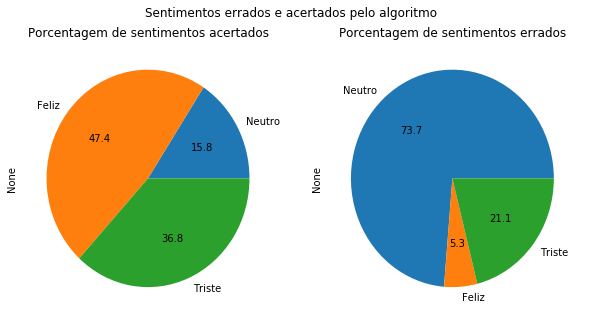

In [7]:
fig = plt.figure(figsize=(10, 5))
plt.subplot(121)
mdc_acerto.plot(kind='pie',title='Porcentagem de sentimentos acertados',autopct='%.1f')
plt.subplot(122)
mdc_erro.plot(kind='pie',title='Porcentagem de sentimentos errados',autopct='%.1f')
fig.suptitle('Sentimentos errados e acertados pelo algoritmo')
plt.show()

In [8]:
n=neutro["Acerto"]+neutro["Erro"]
neutro["Acerto"]=100*neutro["Acerto"]/(n)
neutro["Erro"]=100*neutro["Erro"]/(n)

f=feliz["Acerto"]+feliz["Erro"]
feliz["Acerto"]=100*feliz["Acerto"]/(f)
feliz["Erro"]=100*feliz["Erro"]/(f)

t=triste["Acerto"]+triste["Erro"]
triste["Acerto"]=100*triste["Acerto"]/(t)
triste["Erro"]=100*triste["Erro"]/(t)

Tabela=pd.DataFrame(data=[neutro,feliz,triste], index=["Neutro","Feliz","Triste"])

print("Porcentagem de erros e acertos para cada sentimento")
Tabela

Porcentagem de erros e acertos para cada sentimento


,Acerto,Erro
Neutro,30,70
Feliz,94,5
Triste,77,22


In [9]:
print(feliz["Acerto"]+triste["Acerto"]+neutro["Acerto"])

201


In [10]:
print(feliz["Erro"]+triste["Erro"]+neutro["Erro"])

97


In [14]:
201*100/(201+97)

67